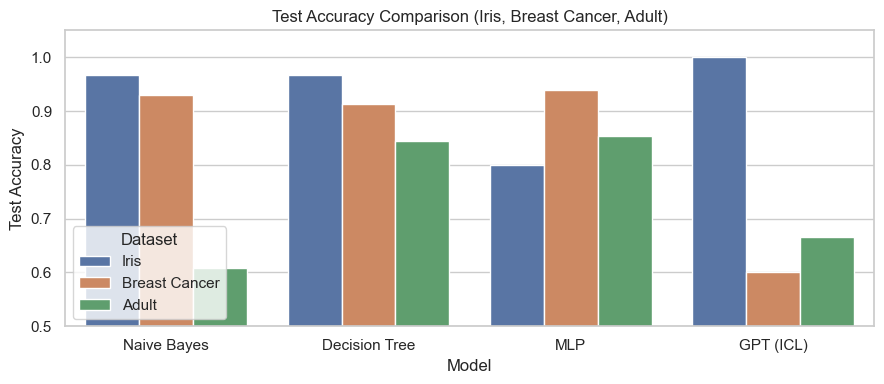

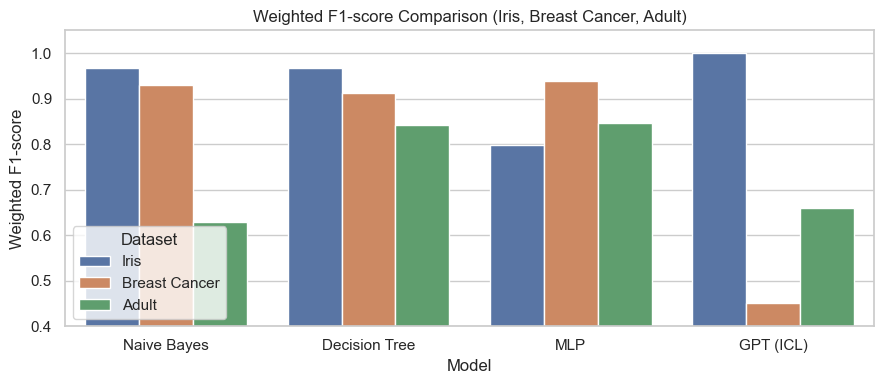

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.0)

data = [
    # dataset,        model,          test_accuracy, test_f1_weighted
    ("Iris",          "Naive Bayes",  0.9667,        0.9666),
    ("Iris",          "Decision Tree",0.9667,        0.9666),
    ("Iris",          "MLP",          0.8000,        0.7980),
    ("Iris",          "GPT (ICL)",    1.0000,        1.0000),

    ("Breast Cancer", "Naive Bayes",  0.9298,        0.9298),
    ("Breast Cancer", "Decision Tree",0.9123,        0.9127),
    ("Breast Cancer", "MLP",          0.9386,        0.9384),
    ("Breast Cancer", "GPT (ICL)",    0.6000,        0.4500),

    ("Adult",         "Naive Bayes",  0.6090,        0.6299),
    ("Adult",         "Decision Tree",0.8452,        0.8432),
    ("Adult",         "MLP",          0.8536,        0.8468),
    ("Adult",         "GPT (ICL)",    0.6667,        0.6600),
]

df_all = pd.DataFrame(data, columns=["dataset", "model", "test_accuracy", "test_f1_weighted"])

# Order models nicely
model_order = ["Naive Bayes", "Decision Tree", "MLP", "GPT (ICL)"]
df_all["model"] = pd.Categorical(df_all["model"], categories=model_order, ordered=True)

# ==== Plot 1 – Test Accuracy comparison ====
plt.figure(figsize=(9, 4))
ax1 = sns.barplot(data=df_all, x="model", y="test_accuracy", hue="dataset")
ax1.set_title("Test Accuracy Comparison (Iris, Breast Cancer, Adult)")
ax1.set_xlabel("Model")
ax1.set_ylabel("Test Accuracy")
ax1.set_ylim(0.5, 1.05)   # thoda upar tak so bars look nice
plt.legend(title="Dataset", loc="lower left")
plt.tight_layout()
plt.show()

# ==== Plot 2 – Weighted F1-score comparison ====
plt.figure(figsize=(9, 4))
ax2 = sns.barplot(data=df_all, x="model", y="test_f1_weighted", hue="dataset")
ax2.set_title("Weighted F1-score Comparison (Iris, Breast Cancer, Adult)")
ax2.set_xlabel("Model")
ax2.set_ylabel("Weighted F1-score")
ax2.set_ylim(0.4, 1.05)
plt.legend(title="Dataset", loc="lower left")
plt.tight_layout()
plt.show()

## Overall Discussion: Classical ML vs GPT Few-Shot

### Classical ML (Naive Bayes, Decision Tree, MLP)

- **Iris (3-class)**
  - All three models ≈97–100% accuracy.
  - Naive Bayes & Decision Tree already almost perfect.
  - MLP underperforms slightly here despite higher complexity.

- **Breast Cancer (benign vs malignant)**
  - All three models strong (≈0.91–0.94 accuracy).
  - Naive Bayes: simple, fast, competitive.
  - Decision Tree: reasonably accurate, somewhat interpretable.
  - **MLP**: best weighted F1 and **fewest missed malignant cases** → safest clinically.

- **Adult Income (<=50K vs >50K)**
  - Harder dataset (mixed features + imbalance).
  - Naive Bayes clearly weaker.
  - **Decision Tree & MLP ~0.85 accuracy/F1**, with MLP slightly strongest but also most expensive to tune/train.

**Summary:**  
Naive Bayes = simplest & fastest, good on clean data.  
Decision Tree = good tabular baseline, somewhat interpretable.  
MLP = most powerful and consistent across datasets, but needs careful preprocessing and tuning.

---

### GPT Few-Shot In-Context Learning

- Only **5–6 labeled examples in the prompt**, no gradient training.
- **Iris:** ≈100% accuracy on 30 test samples → can infer simple, low-dimensional decision rules.
- **Breast Cancer:** ≈60% accuracy with 6 numeric features → far below classical models (>0.93).
- **Adult:** ≈66–67% accuracy on 30 test cases → better than random, but worse than Decision Tree/MLP (~0.85).

**Pros:** very easy to set up (just prompt design), no data pipeline or training loop.  
**Cons:** effectively “trained” on a tiny sample; struggles on complex, imbalanced tabular data.

---

### Conclusioon

- For **serious tabular prediction** with labeled data, **classical ML models (especially Decision Tree / MLP)** clearly outperform GPT few-shot in accuracy, F1, and robustness.
- **GPT few-shot** is best seen as a **quick, zero-training prototype** that can work surprisingly well on simple problems (Iris), but **does not replace** properly trained models on realistic datasets like Breast Cancer or Adult Income.